1.Import

2.Exploratory Data Analysis (EDA)

3.Data Preprocessing

4.Model Building

5.Model Evaluation

In [180]:
import numpy as np 
import pandas as pd 
import seaborn as sns
import matplotlib.pyplot as plt

# 2.Exploratory Data Analysis (EDA

In [181]:
# read a dataset 
df = pd.read_csv("diamonds.csv")
df = df.iloc[:,1:]
df

,carat,cut,color,clarity,depth,table,price,x,y,z
0,0.23,Ideal,E,SI2,61.5,55.0,326,3.95,3.98,2.43
1,0.21,Premium,E,SI1,59.8,61.0,326,3.89,3.84,2.31
2,0.23,Good,E,VS1,56.9,65.0,327,4.05,4.07,2.31
3,0.29,Premium,I,VS2,62.4,58.0,334,4.20,4.23,2.63
4,0.31,Good,J,SI2,63.3,58.0,335,4.34,4.35,2.75
...,...,...,...,...,...,...,...,...,...,...
53935,0.72,Ideal,D,SI1,60.8,57.0,2757,5.75,5.76,3.50
53936,0.72,Good,D,SI1,63.1,55.0,2757,5.69,5.75,3.61
53937,0.70,Very Good,D,SI1,62.8,60.0,2757,5.66,5.68,3.56
53938,0.86,Premium,H,SI2,61.0,58.0,2757,6.15,6.12,3.74


In [182]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 53940 entries, 0 to 53939
Data columns (total 10 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   carat    53940 non-null  float64
 1   cut      53940 non-null  object 
 2   color    53940 non-null  object 
 3   clarity  53940 non-null  object 
 4   depth    53940 non-null  float64
 5   table    53940 non-null  float64
 6   price    53940 non-null  int64  
 7   x        53940 non-null  float64
 8   y        53940 non-null  float64
 9   z        53940 non-null  float64
dtypes: float64(6), int64(1), object(3)
memory usage: 4.1+ MB


Feature Details:

1.carat: weight of the diamond (0.2--5.01)

2.cut: quality of the cut (Fair, Good, Very Good, Premium, Ideal)

3.color: diamond colour, from J (worst) to D (best)

4.clarity: a measurement of how clear the diamond is (I1 (worst), SI2, SI1, VS2, VS1, VVS2, VVS1, IF (best))

5.depth: total depth percentage = z / mean(x, y) = 2 * z / (x + y) (43--79)

6.table: width of top of diamond relative to widest point (43--95)

7.price: price in US dollars (326-- 18,823 USD)

8.x length in mm (0--10.74)

 9.y width in mm (0--58.9)

10.z depth in mm (0--31.8)

# task 

Our task is to build an algorithm that, based on the available information about known diamonds

(including the prices of these diamonds), will be able to predict the price of new diamonds.

In [183]:
df

,carat,cut,color,clarity,depth,table,price,x,y,z
0,0.23,Ideal,E,SI2,61.5,55.0,326,3.95,3.98,2.43
1,0.21,Premium,E,SI1,59.8,61.0,326,3.89,3.84,2.31
2,0.23,Good,E,VS1,56.9,65.0,327,4.05,4.07,2.31
3,0.29,Premium,I,VS2,62.4,58.0,334,4.20,4.23,2.63
4,0.31,Good,J,SI2,63.3,58.0,335,4.34,4.35,2.75
...,...,...,...,...,...,...,...,...,...,...
53935,0.72,Ideal,D,SI1,60.8,57.0,2757,5.75,5.76,3.50
53936,0.72,Good,D,SI1,63.1,55.0,2757,5.69,5.75,3.61
53937,0.70,Very Good,D,SI1,62.8,60.0,2757,5.66,5.68,3.56
53938,0.86,Premium,H,SI2,61.0,58.0,2757,6.15,6.12,3.74


In [184]:
df.isnull().sum()

carat      0
cut        0
color      0
clarity    0
depth      0
table      0
price      0
x          0
y          0
z          0
dtype: int64

In [185]:
df.describe()

,carat,depth,table,price,x,y,z
count,53940.000000,53940.000000,53940.000000,53940.000000,53940.000000,53940.000000,53940.000000
mean,0.797940,61.749405,57.457184,3932.799722,5.731157,5.734526,3.538734
std,0.474011,1.432621,2.234491,3989.439738,1.121761,1.142135,0.705699
min,0.200000,43.000000,43.000000,326.000000,0.000000,0.000000,0.000000
25%,0.400000,61.000000,56.000000,950.000000,4.710000,4.720000,2.910000
50%,0.700000,61.800000,57.000000,2401.000000,5.700000,5.710000,3.530000
75%,1.040000,62.500000,59.000000,5324.250000,6.540000,6.540000,4.040000
max,5.010000,79.000000,95.000000,18823.000000,10.740000,58.900000,31.800000


<Axes: ylabel='z'>

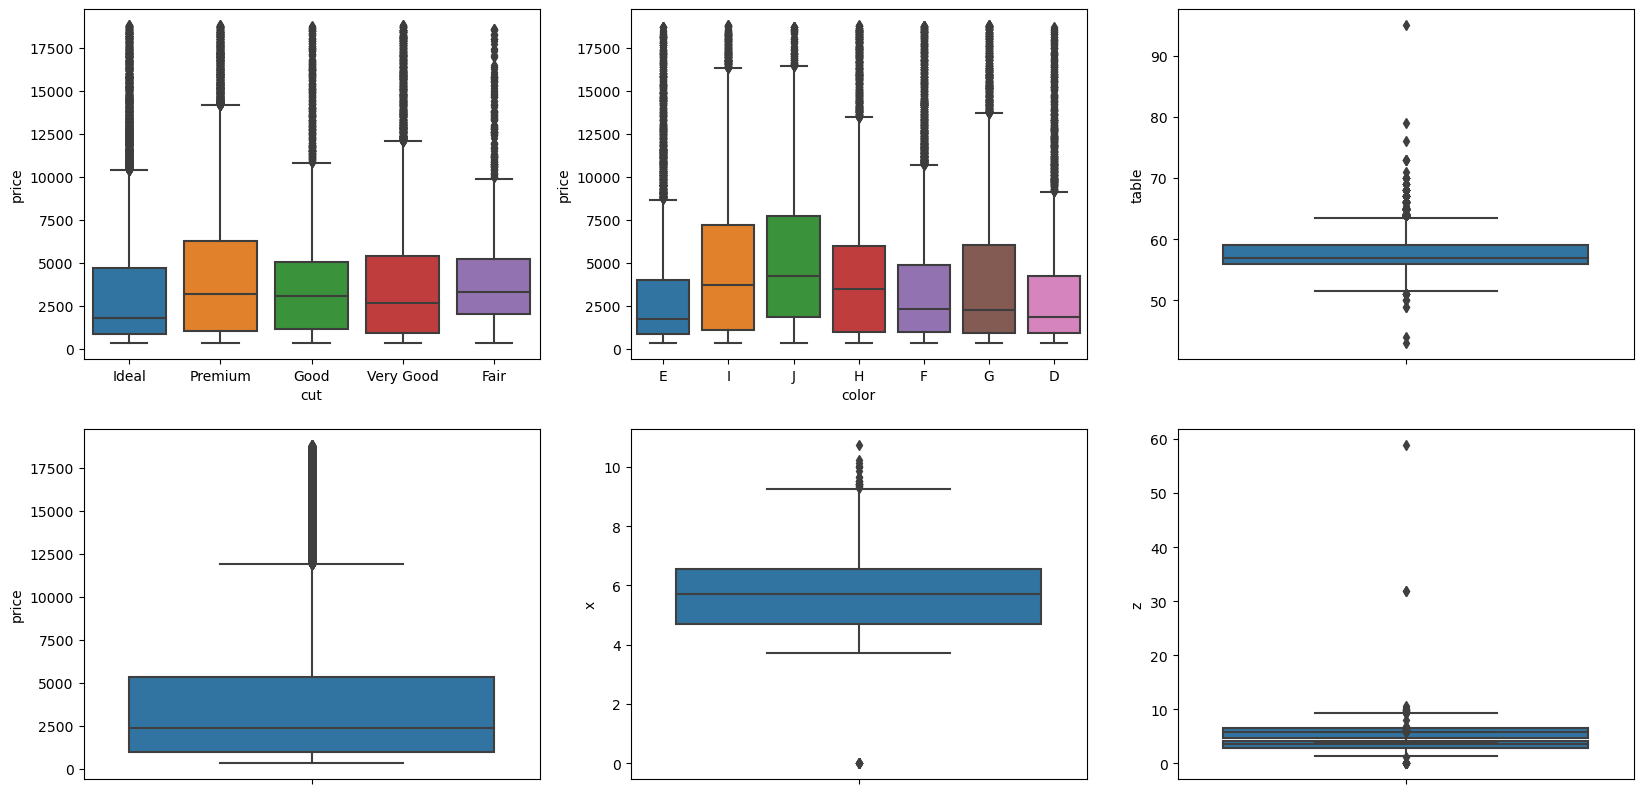

In [186]:
figbi, axesbi = plt.subplots(2, 3, figsize=(20,10))
sns.boxplot(y="price", x="cut",     data=df,     ax=axesbi[0,0])
sns.boxplot(y="price", x="color",  data=df,     ax=axesbi[0,1])
sns.boxplot( y="table", data=df,     ax=axesbi[0,2])
sns.boxplot( y="price",   data=df,     ax=axesbi[1,0])
sns.boxplot( y="x",    data=df,     ax=axesbi[1,1])
sns.boxplot(y="y",    data=df,     ax=axesbi[1,2])
sns.boxplot(y="z",    data=df,     ax=axesbi[1,2])


<Axes: xlabel='z', ylabel='Count'>

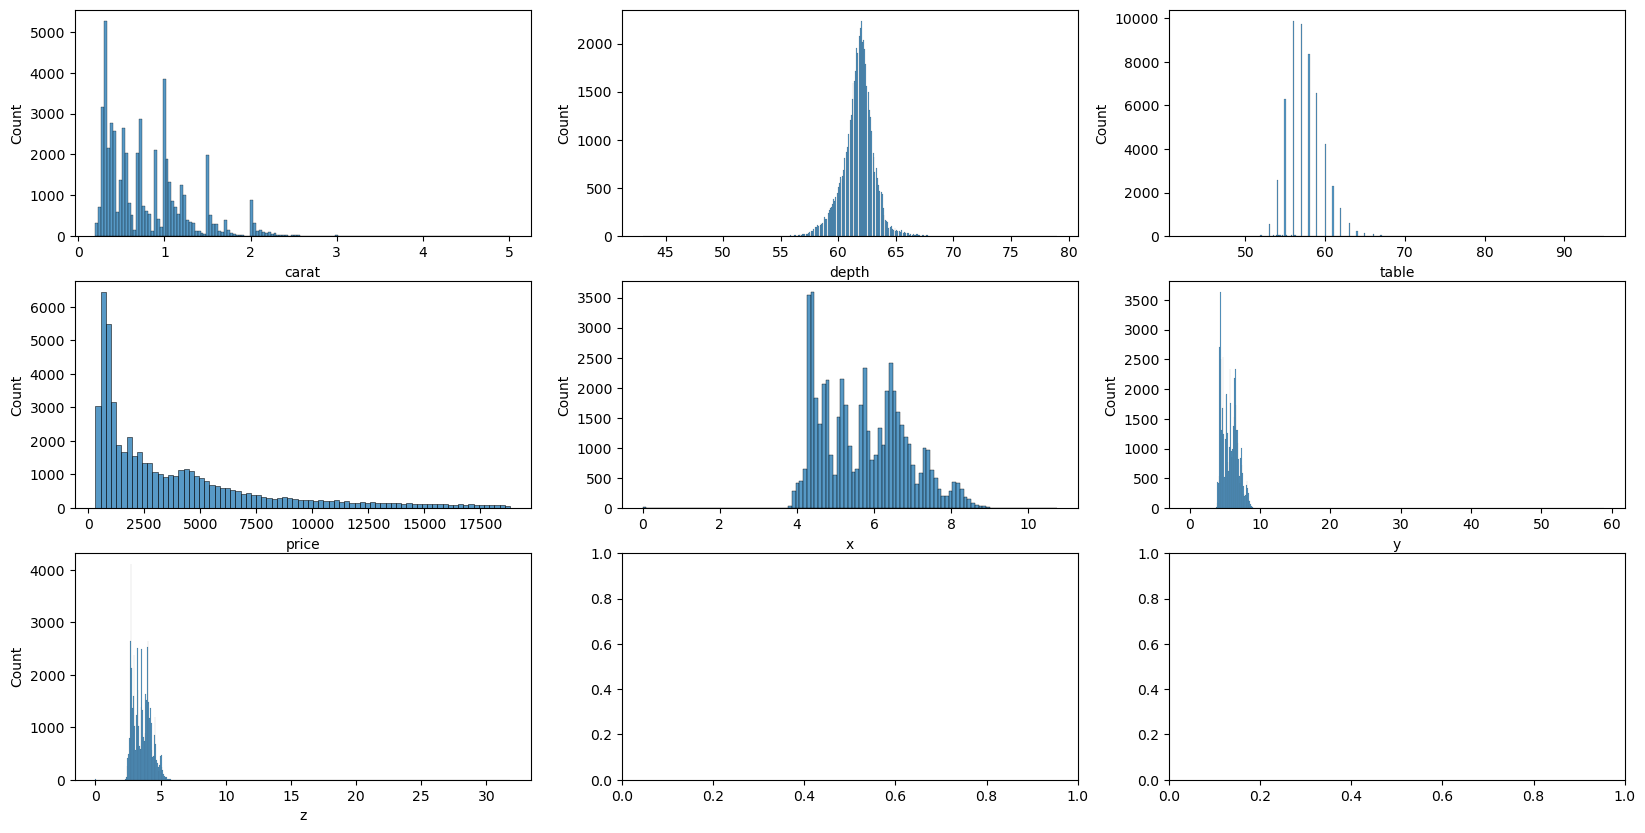

In [187]:
figbi, axesbi = plt.subplots(3, 3, figsize=(20,10))
sns.histplot( x="carat",     data=df,     ax=axesbi[0,0])
sns.histplot( x="depth",  data=df,     ax=axesbi[0,1])
sns.histplot( x="table", data=df,     ax=axesbi[0,2])
sns.histplot( x="price",   data=df,     ax=axesbi[1,0])
sns.histplot( x="x",    data=df,     ax=axesbi[1,1])
sns.histplot(x="y",    data=df,     ax=axesbi[1,2])
sns.histplot( x="z",    data=df,     ax=axesbi[2,0])

In [188]:
# viewing the statistical data of the features in the dataset
df.describe(include='all')

,carat,cut,color,clarity,depth,table,price,x,y,z
count,53940.000000,53940,53940,53940,53940.000000,53940.000000,53940.000000,53940.000000,53940.000000,53940.000000
unique,NaN,5,7,8,NaN,NaN,NaN,NaN,NaN,NaN
top,NaN,Ideal,G,SI1,NaN,NaN,NaN,NaN,NaN,NaN
freq,NaN,21551,11292,13065,NaN,NaN,NaN,NaN,NaN,NaN
mean,0.797940,NaN,NaN,NaN,61.749405,57.457184,3932.799722,5.731157,5.734526,3.538734
std,0.474011,NaN,NaN,NaN,1.432621,2.234491,3989.439738,1.121761,1.142135,0.705699
min,0.200000,NaN,NaN,NaN,43.000000,43.000000,326.000000,0.000000,0.000000,0.000000
25%,0.400000,NaN,NaN,NaN,61.000000,56.000000,950.000000,4.710000,4.720000,2.910000
50%,0.700000,NaN,NaN,NaN,61.800000,57.000000,2401.000000,5.700000,5.710000,3.530000
75%,1.040000,NaN,NaN,NaN,62.500000,59.000000,5324.250000,6.540000,6.540000,4.040000


In [189]:
df[df["x"]==0]

,carat,cut,color,clarity,depth,table,price,x,y,z
11182,1.07,Ideal,F,SI2,61.6,56.0,4954,0.0,6.62,0.0
11963,1.00,Very Good,H,VS2,63.3,53.0,5139,0.0,0.00,0.0
15951,1.14,Fair,G,VS1,57.5,67.0,6381,0.0,0.00,0.0
24520,1.56,Ideal,G,VS2,62.2,54.0,12800,0.0,0.00,0.0
26243,1.20,Premium,D,VVS1,62.1,59.0,15686,0.0,0.00,0.0
27429,2.25,Premium,H,SI2,62.8,59.0,18034,0.0,0.00,0.0
49556,0.71,Good,F,SI2,64.1,60.0,2130,0.0,0.00,0.0
49557,0.71,Good,F,SI2,64.1,60.0,2130,0.0,0.00,0.0


In [190]:
# Checking for value 0 in the columns 'x', 'y' and 'z'
d = df[np.logical_or(np.logical_or(df['x'] == 0, df['y'] == 0), df['z'] == 0)]
len(d)

20

20 rows with zero dimension.

In [191]:
# dropping rows with value 0 in the columns x, y, and z
rows=['x', 'y', 'z']
df[rows] = df[rows].replace(0, np.NaN)
df.dropna(subset=rows, inplace=True)

In [192]:
df[df.duplicated()]

,carat,cut,color,clarity,depth,table,price,x,y,z
1005,0.79,Ideal,G,SI1,62.3,57.0,2898,5.90,5.85,3.66
1006,0.79,Ideal,G,SI1,62.3,57.0,2898,5.90,5.85,3.66
1007,0.79,Ideal,G,SI1,62.3,57.0,2898,5.90,5.85,3.66
1008,0.79,Ideal,G,SI1,62.3,57.0,2898,5.90,5.85,3.66
2025,1.52,Good,E,I1,57.3,58.0,3105,7.53,7.42,4.28
...,...,...,...,...,...,...,...,...,...,...
47296,0.30,Good,J,VS1,63.4,57.0,394,4.23,4.26,2.69
47969,0.52,Ideal,D,VS2,61.8,55.0,1919,5.19,5.16,3.20
49326,0.51,Ideal,F,VVS2,61.2,56.0,2093,5.17,5.19,3.17
50079,0.51,Ideal,F,VVS2,61.2,56.0,2203,5.19,5.17,3.17


In [193]:
df = df.drop_duplicates()

In [194]:

# checking the shape of the dataset
df.shape

(53775, 10)

In [195]:
df.corr()

,carat,depth,table,price,x,y,z
carat,1.000000,0.027889,0.181113,0.921548,0.977857,0.953980,0.961030
depth,0.027889,1.000000,-0.297580,-0.011144,-0.025224,-0.029262,0.094678
table,0.181113,-0.297580,1.000000,0.126666,0.195451,0.183814,0.151683
price,0.921548,-0.011144,0.126666,1.000000,0.887137,0.867685,0.868030
x,0.977857,-0.025224,0.195451,0.887137,1.000000,0.974822,0.975382
y,0.953980,-0.029262,0.183814,0.867685,0.974822,1.000000,0.956623
z,0.961030,0.094678,0.151683,0.868030,0.975382,0.956623,1.000000


Text(0.5, 0, 'Cut')

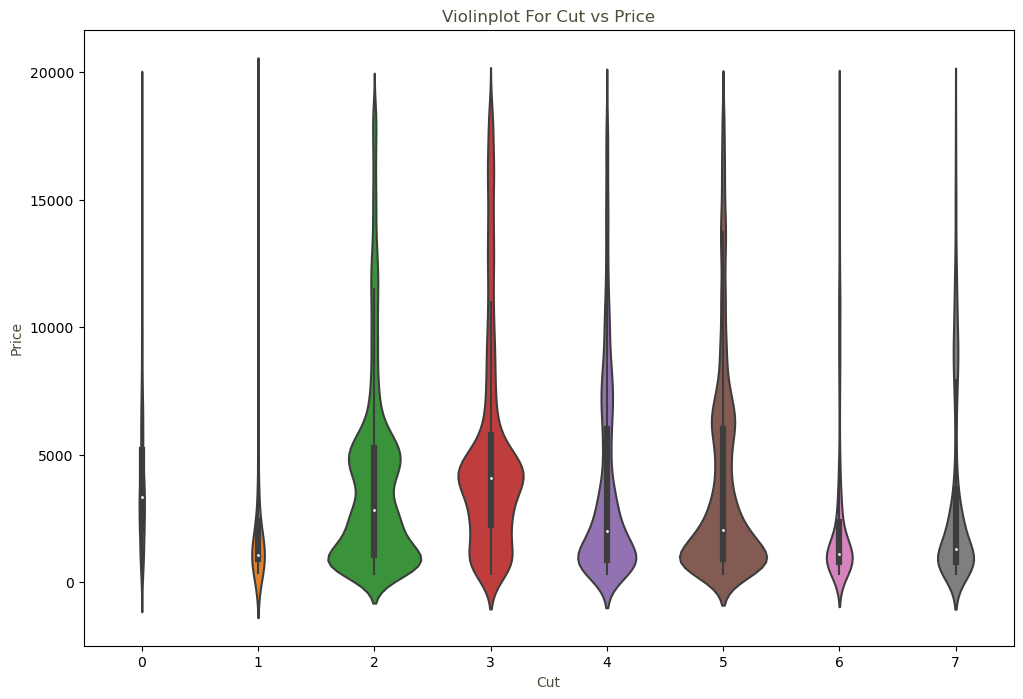

In [213]:
plt.figure(figsize=(12,8))
ax = sns.violinplot(x="clarity",y="price", data=df, scale= "count")
ax.set_title("Violinplot For Cut vs Price", color="#4e4c39")
ax.set_ylabel("Price", color="#4e4c39")
ax.set_xlabel("Cut", color="#4e4c39")

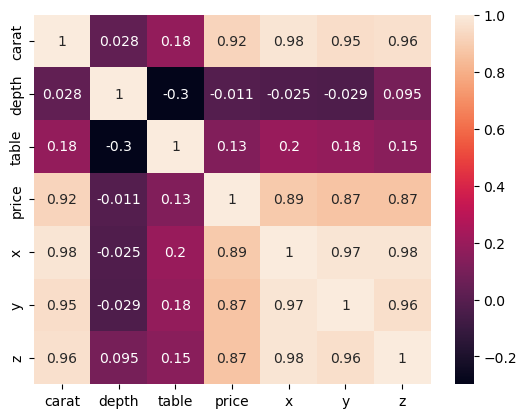

In [196]:
sns.heatmap(df.corr(), annot=True);

From the correlation matrix, following can be observed:

The price of the diamond is highly correlated with the carat and the dimensions (x,y,z). Since the intention is to perform multivariate regression, "carat" won't be considered for predicting the price of the diamond. Hence, the dimensions of the diamond would have the most significant impact on its price.
The carat of the diamond is highly correlated with the price and the dimensions (x,y,z). Since the intention is to perform multivariate regression, "price" won't be considered for predicting the carat of the diamond. Hence, the dimensions of the diamond would have the most significant impact on its carat.
Price and the Carat of the diamond are not correlated with its depth and table.

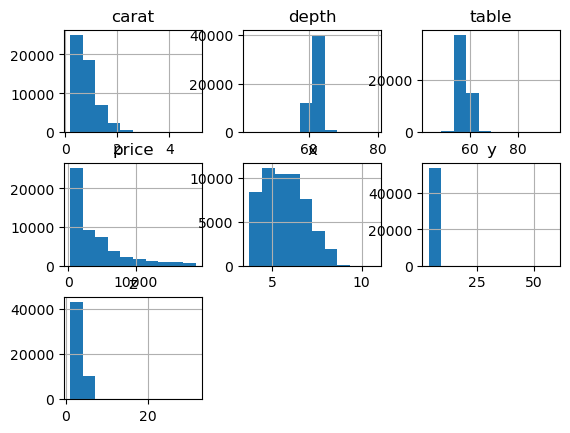

In [197]:
df.hist();

Visual Characteristics of the data

The attributes price, carat, and table dept are having rightly skewed data
Most of the attibutes follows different distributions

In [198]:

# checking the values for each categorical variable
cols = ['cut','color','clarity']
for column in cols:
    print('Unique {} attributes:'.format(column))
    display(df[column].unique().tolist())

Unique cut attributes:


['Ideal', 'Premium', 'Good', 'Very Good', 'Fair']

Unique color attributes:


['E', 'I', 'J', 'H', 'F', 'G', 'D']

Unique clarity attributes:


['SI2', 'SI1', 'VS1', 'VS2', 'VVS2', 'VVS1', 'I1', 'IF']

In [199]:
def barplots(variables,target_var):
    """
    Function to plot graphical relationship
    between categorical variables.
    """
    for num, attribute in enumerate(variables):
        plt.figure(num)
        sns.barplot(x=attribute, y = target_var, data=df)

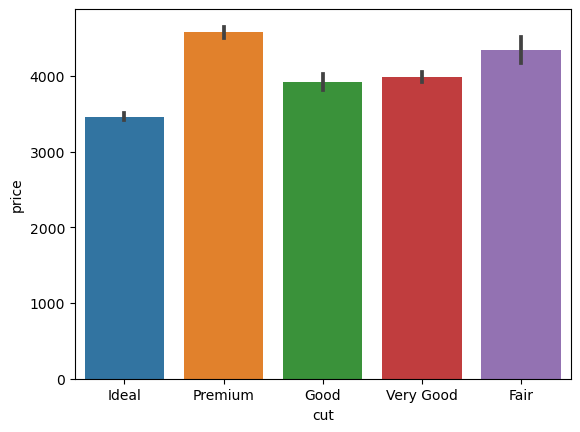

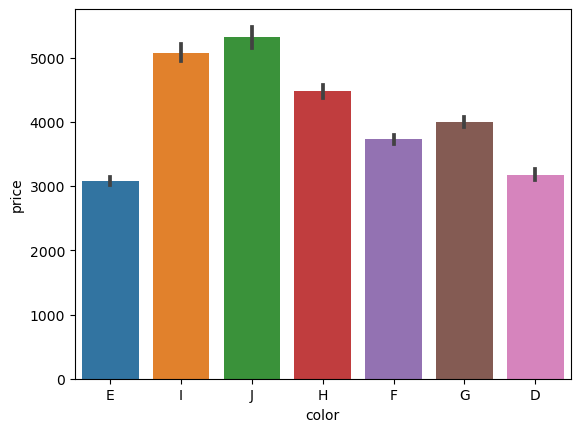

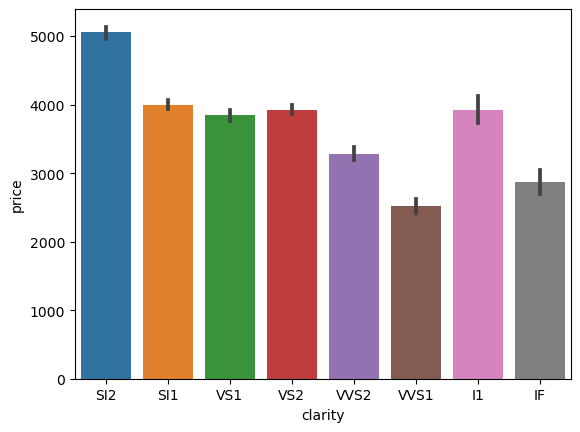

In [200]:
barplots(cols,'price')

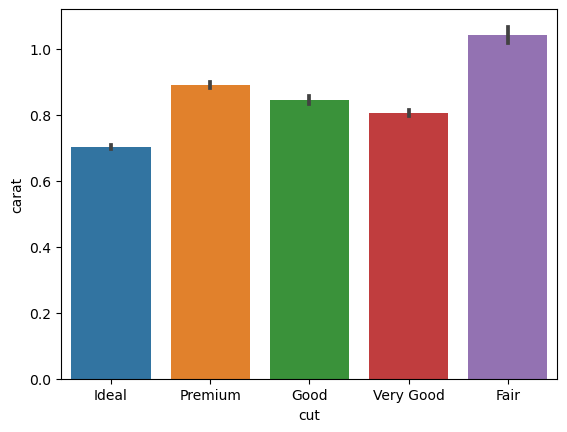

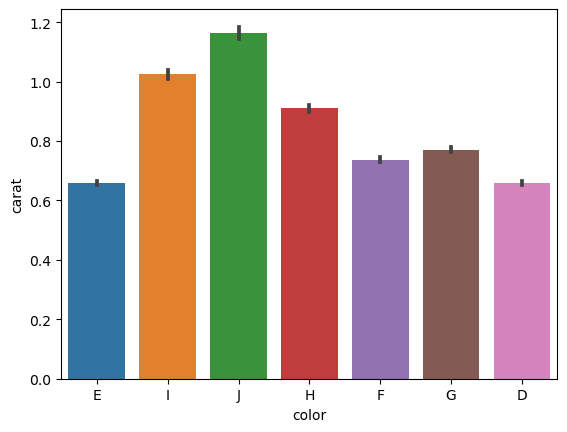

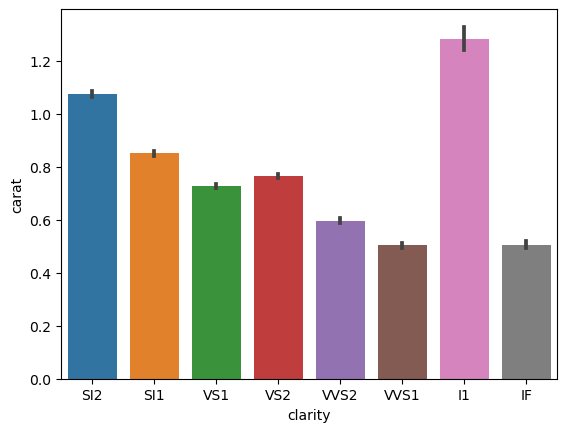

In [201]:
barplots(cols,'carat')

From the barplots, it can be observed that even if 
the Cut quality(Best = Ideal, Worst = Fair), Clarity Quality(Best = IF, Worst = IF) and Color Quality(Best = D, Worst = J) increases respectively, 
the price and carat doesn't seems to be matching,

In [202]:
# sns.pairplot(df)

From the pairplot, following can be observed:

There are certain feature variables which can be classified as outliers, because they seem to be far from the rest of the datapoints, which may play an important role in accuracy calculation of the model.
Some of the vaiables having datapoints far from rest of points are 'y', 'z', and going forward, a decision should be made whther or not to keep them, depending on the accuracy.

In [203]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 53775 entries, 0 to 53939
Data columns (total 10 columns):
 #   Column   Non-Null Count  Dtype  
---  ------   --------------  -----  
 0   carat    53775 non-null  float64
 1   cut      53775 non-null  object 
 2   color    53775 non-null  object 
 3   clarity  53775 non-null  object 
 4   depth    53775 non-null  float64
 5   table    53775 non-null  float64
 6   price    53775 non-null  int64  
 7   x        53775 non-null  float64
 8   y        53775 non-null  float64
 9   z        53775 non-null  float64
dtypes: float64(6), int64(1), object(3)
memory usage: 6.5+ MB


In [205]:
df= df.reset_index()
# df.to_csv('cleaned_Diamnds.csv')

In [206]:
df

,index,carat,cut,color,clarity,depth,table,price,x,y,z
0,0,0.23,Ideal,E,SI2,61.5,55.0,326,3.95,3.98,2.43
1,1,0.21,Premium,E,SI1,59.8,61.0,326,3.89,3.84,2.31
2,2,0.23,Good,E,VS1,56.9,65.0,327,4.05,4.07,2.31
3,3,0.29,Premium,I,VS2,62.4,58.0,334,4.20,4.23,2.63
4,4,0.31,Good,J,SI2,63.3,58.0,335,4.34,4.35,2.75
...,...,...,...,...,...,...,...,...,...,...,...
53770,53935,0.72,Ideal,D,SI1,60.8,57.0,2757,5.75,5.76,3.50
53771,53936,0.72,Good,D,SI1,63.1,55.0,2757,5.69,5.75,3.61
53772,53937,0.70,Very Good,D,SI1,62.8,60.0,2757,5.66,5.68,3.56
53773,53938,0.86,Premium,H,SI2,61.0,58.0,2757,6.15,6.12,3.74


In [207]:
import warnings
warnings.filterwarnings("ignore")

In [208]:
from sklearn.linear_model import LinearRegression
from sklearn.preprocessing import StandardScaler,LabelEncoder
from sklearn.ensemble import RandomForestRegressor
from xgboost import XGBRegressor
from sklearn.metrics import mean_squared_error, r2_score


In [209]:
obj_col = ['cut','color','clarity']
for col in obj_col:
    le = LabelEncoder()
    df[col] = le.fit_transform(df[col])
df

,index,carat,cut,color,clarity,depth,table,price,x,y,z
0,0,0.23,2,1,3,61.5,55.0,326,3.95,3.98,2.43
1,1,0.21,3,1,2,59.8,61.0,326,3.89,3.84,2.31
2,2,0.23,1,1,4,56.9,65.0,327,4.05,4.07,2.31
3,3,0.29,3,5,5,62.4,58.0,334,4.20,4.23,2.63
4,4,0.31,1,6,3,63.3,58.0,335,4.34,4.35,2.75
...,...,...,...,...,...,...,...,...,...,...,...
53770,53935,0.72,2,0,2,60.8,57.0,2757,5.75,5.76,3.50
53771,53936,0.72,1,0,2,63.1,55.0,2757,5.69,5.75,3.61
53772,53937,0.70,4,0,2,62.8,60.0,2757,5.66,5.68,3.56
53773,53938,0.86,3,4,3,61.0,58.0,2757,6.15,6.12,3.74


In [210]:
X = df.drop(['price','index'],axis=1)
y = df['price']

In [211]:
X

,carat,cut,color,clarity,depth,table,x,y,z
0,0.23,2,1,3,61.5,55.0,3.95,3.98,2.43
1,0.21,3,1,2,59.8,61.0,3.89,3.84,2.31
2,0.23,1,1,4,56.9,65.0,4.05,4.07,2.31
3,0.29,3,5,5,62.4,58.0,4.20,4.23,2.63
4,0.31,1,6,3,63.3,58.0,4.34,4.35,2.75
...,...,...,...,...,...,...,...,...,...
53770,0.72,2,0,2,60.8,57.0,5.75,5.76,3.50
53771,0.72,1,0,2,63.1,55.0,5.69,5.75,3.61
53772,0.70,4,0,2,62.8,60.0,5.66,5.68,3.56
53773,0.86,3,4,3,61.0,58.0,6.15,6.12,3.74


In [162]:
from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.2, random_state = 0)

In [163]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()
X_train = sc.fit_transform(X_train)
X_test = sc.transform(X_test)

In [165]:
# calculate MAE using scikit-learn
from sklearn import metrics

In [166]:
# instantiate
linreg = LinearRegression()

# fit the model to the training data (learn the coefficients)
linreg.fit(X_train, y_train)
y_pred = linreg.predict(X_test)
print(np.sqrt(metrics.mean_squared_error(y_test, y_pred)))

1315.92991449785


In [167]:
print('Linear Regression testing score is',linreg.score(X_test,y_test))

Linear Regression testing score is 0.892586143464337


In [168]:
r2_score(y_test, y_pred)

0.892586143464337

In [170]:
r2_score(y_test, y_pred)

0.892586143464337

In [171]:
from xgboost import XGBRegressor
# instantiate
XGB = XGBRegressor()

# fit the model to the training data (learn the coefficients)
XGB.fit(X_train, y_train)
y_pred_X = XGB.predict(X_test)
print(np.sqrt(metrics.mean_squared_error(y_test, y_pred_X)))

546.9781495647584


In [172]:
r2_score(y_test, y_pred_X)

0.9814418472266173

In [197]:
print("We finalize the algorithm : Random Forest =  RF:: 98%")

We finalize the algorithm : Random Forest =  RF:: 98%


In [173]:
from sklearn.ensemble import RandomForestRegressor
# instantiate
RF = RandomForestRegressor()

# fit the model to the training data (learn the coefficients)
RF.fit(X_train, y_train)
y_pred_R = RF.predict(X_test)
print(np.sqrt(metrics.mean_squared_error(y_test, y_pred_R)))

553.5662615942341


In [174]:
r2_score(y_test, y_pred_R)

0.9809921053387947

In [ ]:
rf = RandomForestRegressor()
rf.fit(X_train, y_train)
rf_pred = rf.predict(X_test)

mse_rf = mean_squared_error(y_test, rf_pred)

In [154]:
# regression_models = ['Linear Regression', 'Lasso Regression',  'Ridge Regression', 
#                      'RandomForest Regression','XGBRegressor','KNeighborsRegressor']

regressors = []

regressors.append(('LR',LinearRegression()))
regressors.append(('Lasso',Lasso(alpha=0.0001)))
regressors.append(('Ridge',Ridge()))
regressors.append(('RF',RandomForestRegressor()))
regressors.append(('XGB',XGBRegressor()))
regressors.append(('KNN',KNeighborsRegressor()))

In [174]:
results = []
names = []
scoring = 'r2'
for name, model in regressors:
	kfold = KFold(n_splits=10)
	cv_results = cross_val_score(model, X, y, cv=kfold, scoring=scoring)
	results.append(cv_results)
	names.append(name)
	msg = "%s: %f (%f)" % (name, cv_results.mean(), cv_results.std())
	print(msg)

LR: -3.886526 (8.472525)


KeyboardInterrupt: 

In [185]:
g


,price,pre
43374,1409,1532.225705
33116,816,874.690164
37564,988,1468.441509
19830,8398,6943.429581
29735,708,1207.718431
...,...,...
5815,3913,4403.612476
1858,3066,3915.467932
38316,1019,-827.170386
10728,593,-665.230166


In [184]:
g = pd.DataFrame(y_test)
g['pre'] = y_pred

In [189]:
print(rmse_scores.mean())

1130.6608586500483


In [188]:
rmse_scores = np.sqrt(mse_scores)
print(rmse_scores)

[ 863.61334939  828.7812337   948.0710695  1310.61919885 2661.42090131
 1584.64317776  723.01144485  810.07964744  852.01840983  724.35015389]


In [187]:
# fix the sign of MSE scores
mse_scores = -scores
print(mse_scores)

[ 745828.01724619  686878.33332735  898838.75281546 1717722.68439708
 7083161.2139268  2511094.00081365  522745.54937834  656229.03519349
  725935.37068765  524683.14543426]


In [186]:
# 10-fold cross-validation with all three features
lm = LinearRegression()
scores = cross_val_score(lm, X, y, cv=10, scoring='neg_mean_squared_error')
print(scores)

[ -745828.01724619  -686878.33332735  -898838.75281546 -1717722.68439708
 -7083161.2139268  -2511094.00081365  -522745.54937834  -656229.03519349
  -725935.37068765  -524683.14543426]


In [124]:
from sklearn.compose import ColumnTransformer
from sklearn.preprocessing import OneHotEncoder
import pandas as pd

# Create a sample dataframe
data = {'Color': ['Red', 'Blue', 'Green', 'Red', 'Green', 'Blue'],}
df1= pd.DataFrame(data)

# Define the categorical columns for one-hot encoding
cat_cols = ['Color']
# Create a column transformer object
ct = ColumnTransformer([('one_hot_encoder', OneHotEncoder(), cat_cols)], remainder='passthrough')

# Fit and transform the data
data_encoded = ct.fit_transform(df1)
# Get column names
col_names = ct.named_transformers_['one_hot_encoder'].get_feature_names_out(cat_cols)

# Create a new dataframe with column names
df_encoded = pd.DataFrame(data_encoded, columns=list(col_names)+list(df1.columns[len(cat_cols):]))

# Print the encoded dataframe with column names
print(df_encoded)


   Color_Blue  Color_Green  Color_Red
0         0.0          0.0        1.0
1         1.0          0.0        0.0
2         0.0          1.0        0.0
3         0.0          0.0        1.0
4         0.0          1.0        0.0
5         1.0          0.0        0.0


In [105]:
np.array(feature_label).ravel()

ValueError: setting an array element with a sequence. The requested array has an inhomogeneous shape after 1 dimensions. The detected shape was (3,) + inhomogeneous part.

In [104]:
feature_label = ohe.categories_

In [103]:
ohe.categories_

[array(['Fair', 'Good', 'Ideal', 'Premium', 'Very Good'], dtype=object),
 array(['D', 'E', 'F', 'G', 'H', 'I', 'J'], dtype=object),
 array(['I1', 'IF', 'SI1', 'SI2', 'VS1', 'VS2', 'VVS1', 'VVS2'],
       dtype=object)]

In [102]:
X

array([[0., 0., 1., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 1., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 1., ..., 0., 0., 0.]])